## Notebook for final project

In [1]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import plotly.graph_objs as go
import plotly.figure_factory as ff
import itertools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,classification_report

# Library for the statistic data vizualisation
import seaborn as sns
import joblib

%matplotlib inline

Using TensorFlow backend.


## Load Data

In [2]:
%pwd

'C:\\Users\\huang\\Dropbox'

In [3]:
my_path = %pwd

In [4]:
data = pd.read_csv(f'{my_path}/fraud_detection_dataset.csv')
print('Shape of data: ',data.shape)
data.head(3)

Shape of data:  (284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

In [5]:
df = pd.DataFrame(data) # Converting data to Panda DataFrame

In [6]:
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

## Binning the time

In [7]:
print("The num of months {}".format(np.argmax(df.Time)/30))
df['Month'] = pd.qcut(df['Time'], 9494)
df['Month']=df['Month'].cat.codes
df.head(5)

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



The num of months 9493.533333333333


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  Class  Month  
0  0.133558 -0.021053  149.62      0      0  
1 -0.008983  0.014724    2.69      0      0  
2 -0.055353 -0.059752  378.66      0      0  
3  0.062723  0.061458  123.50      0      0  
4  0.219422  0.215153   69.99      0      0  

[5 rows x 32 columns]

### Transactions in time

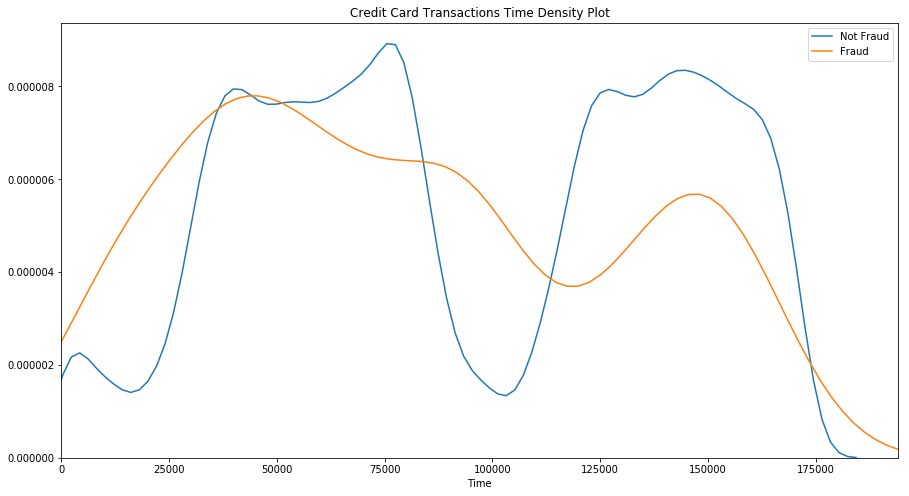

In [8]:
plt.figure(figsize=(15,8))

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

ax=sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
ax=sns.distplot(class_1,hist=False,rug=False,label='Fraud').set_title('Credit Card Transactions Time Density Plot')

## Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

### Transaction Amount

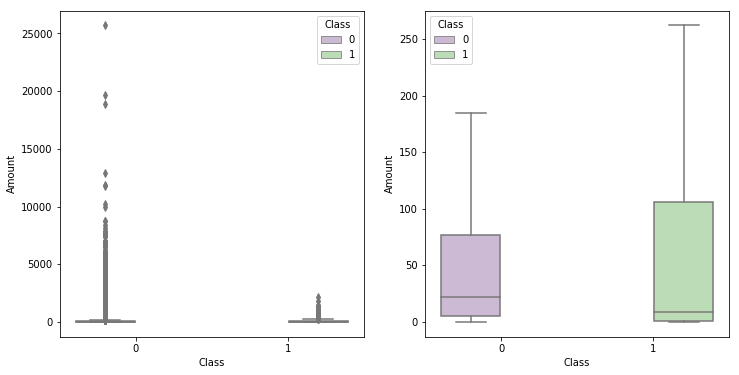

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [10]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)

layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig=go.Figure()
fig.update_layout(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest')

fig.add_trace(trace)

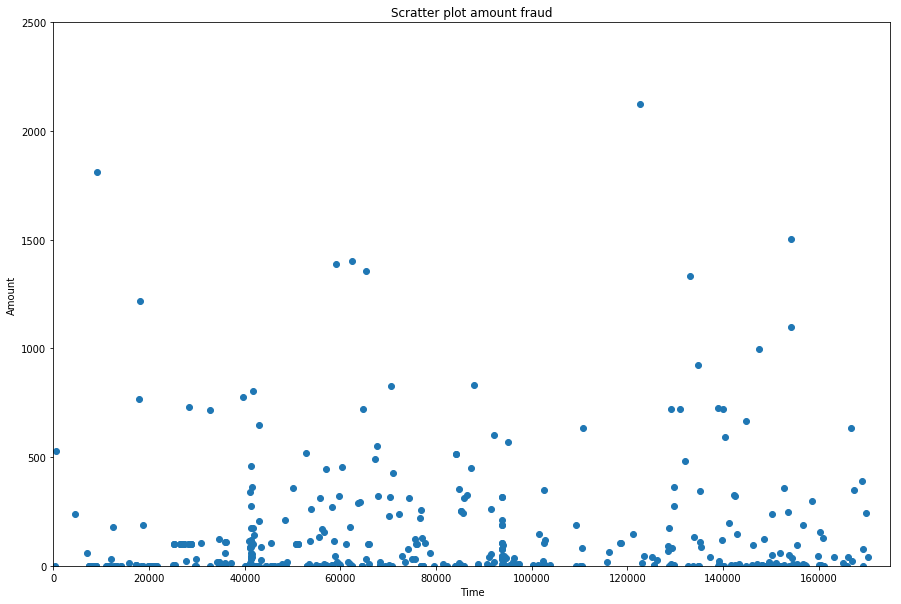

In [11]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

We notive, first of all, the time doesn't impact the frequency of frauds. Moreover, the majority of frauds are small amounts.

In [12]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [13]:
data = pd.read_csv(f'{my_path}/fraud_detection_dataset.csv')

number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud

In [14]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


To answer this problem we could use the oversampling principle or the undersampling principle The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.

## Correlation of features

In [15]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

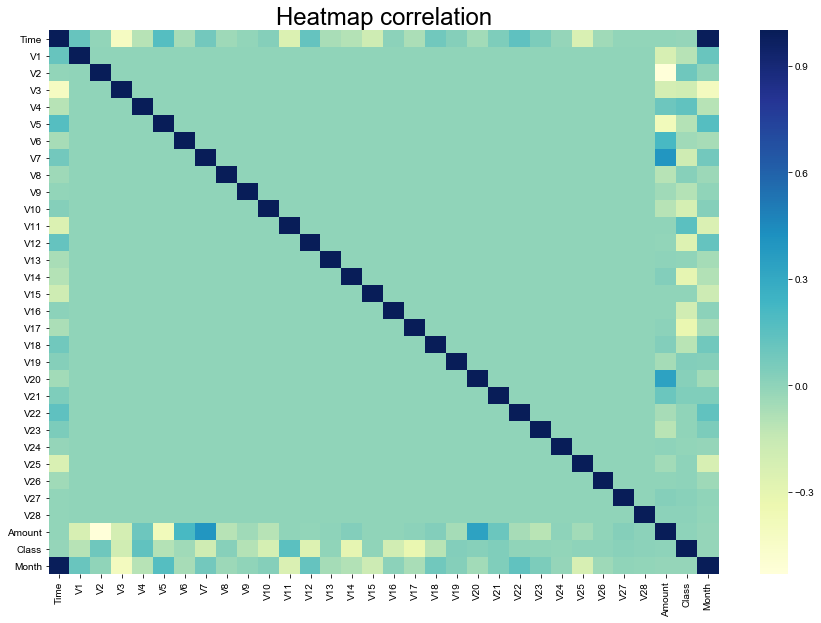

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA was previously performed on the data.

What can generally be done on a massive dataset is a dimension reduction. By picking th emost important dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly.

In [17]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)
df_rank

Class
Class   1.000000
V17     0.326481
V14     0.302544
V12     0.260593
V10     0.216883
V16     0.196539
V3      0.192961
V7      0.187257
V11     0.154876
V4      0.133447
V18     0.111485
V1      0.101347
V9      0.097733
V5      0.094974
V2      0.091289
V6      0.043643
V21     0.040413
V19     0.034783
V20     0.020090
V8      0.019875
V27     0.017580
Time    0.012323
Month   0.011692
V28     0.009536
V24     0.007221
Amount  0.005632
V13     0.004570
V26     0.004455
V15     0.004223
V25     0.003308
V23     0.002685
V22     0.000805

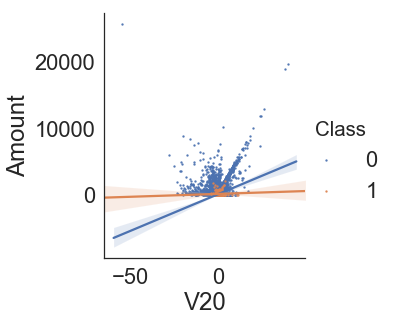

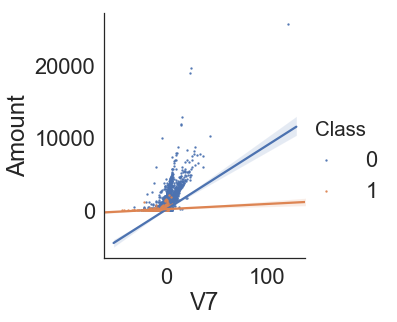

In [18]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.

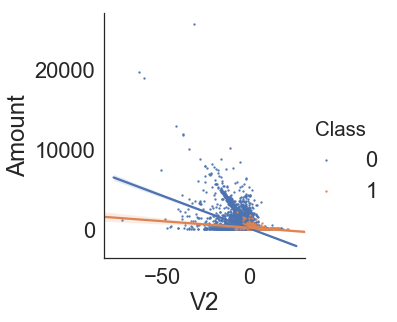

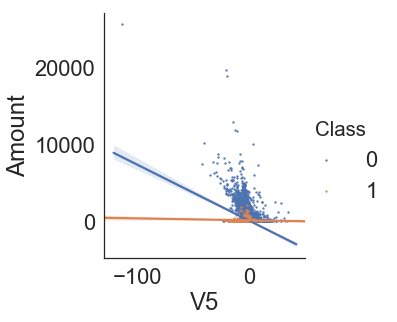

In [19]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

## Scale the data except class and account

In [20]:
col_to_normalize=df.drop(['Class','Amount'],axis=1).columns.values.tolist()

std=StandardScaler()
df_to_nor=df[col_to_normalize]
df=df.drop(col_to_normalize,axis=1)

std.fit(df_to_nor)
df_to_nor=pd.DataFrame(std.transform(df_to_nor),columns=col_to_normalize)

df=pd.concat([df,df_to_nor],axis=1)
df.head(5)

Amount  Class      Time        V1        V2        V3        V4        V5  \
0  149.62      0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117   
1    2.69      0 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483   
2  378.66      0 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572   
3  123.50      0 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469   
4   69.99      0 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015   

         V6        V7  ...       V20       V21       V22       V23       V24  \
0  0.347068  0.193679  ...  0.326118 -0.024923  0.382854 -0.176911  0.110507   
1 -0.061820 -0.063700  ... -0.089611 -0.307377 -0.880077  0.162201 -0.561131   
2  1.351454  0.639776  ...  0.680975  0.337632  1.063358  1.456320 -1.138092   
3  0.936150  0.192071  ... -0.269855 -0.147443  0.007267 -0.304777 -1.941027   
4  0.071999  0.479302  ...  0.529939 -0.012839  1.100011 -0.220123  0.233250   

        V25       V26       V27       V28     Month  
0  0.246585 -0.392170  0.330892 -0.063781 -1.731851  
1  0.320694  0.261069 -0.022256  0.044608 -1.731851  
2 -0.628537 -0.288447 -0.137137 -0.181021 -1.731851  
3  1.241904 -0.460217  0.155396  0.186189 -1.731851  
4 -0.395202  1.041611  0.543620  0.651816 -1.731851  

[5 rows x 32 columns]

## Data Selection

In [21]:
#Drop the useless time feature
X=df.drop(['Class','Time'],axis=1)
Y=df['Class']

## Random undersampling to resample the data

In [22]:
rus = RandomUnderSampler(sampling_strategy=1)
col=X.columns
X, Y = rus.fit_resample(X, Y)
X=pd.DataFrame(X,columns=col)

Counter(Y)

Counter({0: 492, 1: 492})

In [23]:
my_df=pd.DataFrame(X.copy())
my_df['Class']=Y

## Try to find the outliars

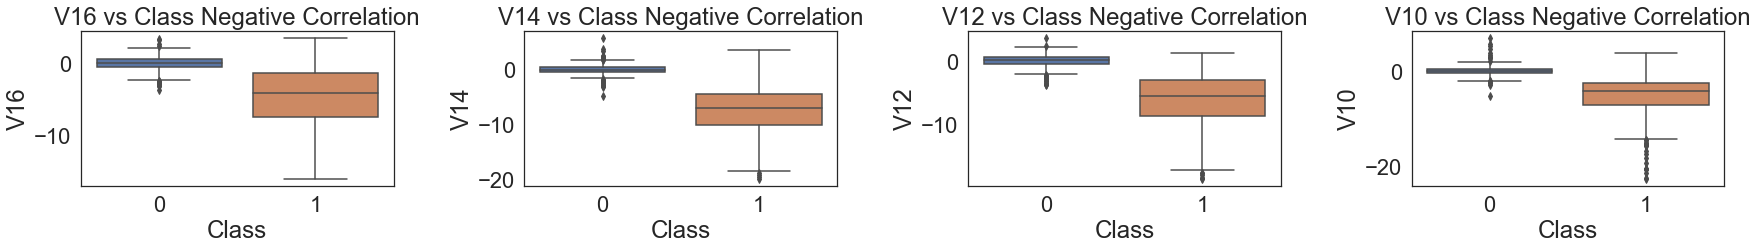

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(25,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V16", data=my_df, ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=my_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=my_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=my_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.tight_layout()
plt.show()

## Use IQR to delete those outliars which affect badly on our prediction


In [25]:
data = my_df['V14'].loc[my_df['Class'] == 1].values
q1, q3 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q3 - q1

lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
my_df = my_df.drop(my_df[(my_df['V14'] > upper_bound) | (my_df['V14'] <lower_bound)].index)

data = my_df['V12'].loc[my_df['Class'] == 1].values
q1, q3 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q3 - q1

lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

my_df = my_df.drop(my_df[(my_df['V12'] > upper_bound) | (my_df['V12'] <lower_bound)].index)

data = my_df['V10'].loc[my_df['Class'] == 1].values
q1, q3 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q3 - q1

lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

my_df = my_df.drop(my_df[(my_df['V10'] > upper_bound) | (my_df['V10'] <lower_bound)].index)

## The amount of outliars decreases

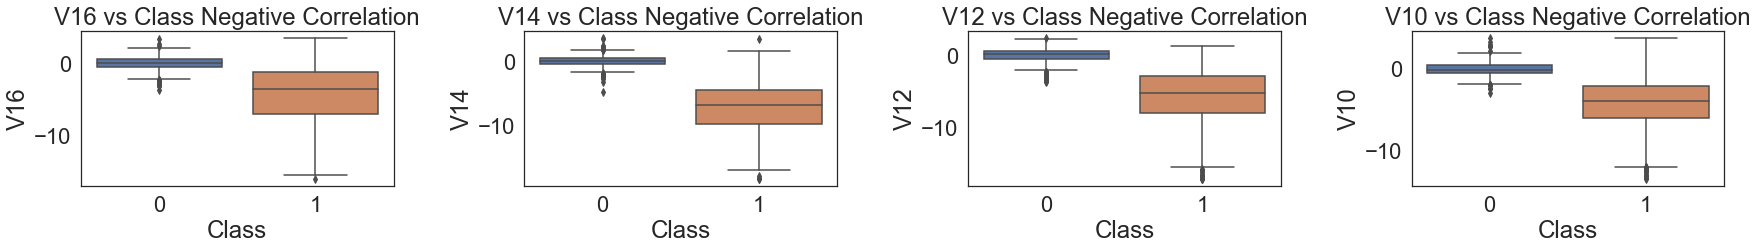

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(25,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V16", data=my_df, ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=my_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=my_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=my_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.tight_layout()
plt.show()

In [27]:
X=my_df.drop(['Class'],axis=1)
Y=my_df['Class']

## Cost matrix used for cost sensitive learning
- To evaluate a model’s performance in terms of costs, I first calculated the sum of all costs resulting from the predictions based on whether the model predicted a False Positive, False Negative, True Positive or True Negative and the costs associated with each case.

In [28]:
#cost matrix
cost_mat = np.zeros((my_df.shape[0], 4))
cost_mat[:, 0] = 3
cost_mat[:, 1] = my_df['Amount']
cost_mat[:, 2] = 3
cost_mat[:, 3] = 0

In [29]:
from sklearn.model_selection import GridSearchCV,train_test_split

# However as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled training data 
# (for those using the undersampling principle if results are really bad just rerun the training dataset definition)

# We seperate ours data in two groups : a train dataset and a test dataset

X_train,X_test,Y_train,Y_test,cost_mat_train, cost_mat_valid=train_test_split(X,Y,cost_mat,train_size=0.75,random_state=5,shuffle=True)

## Heatmap of correlation is informative

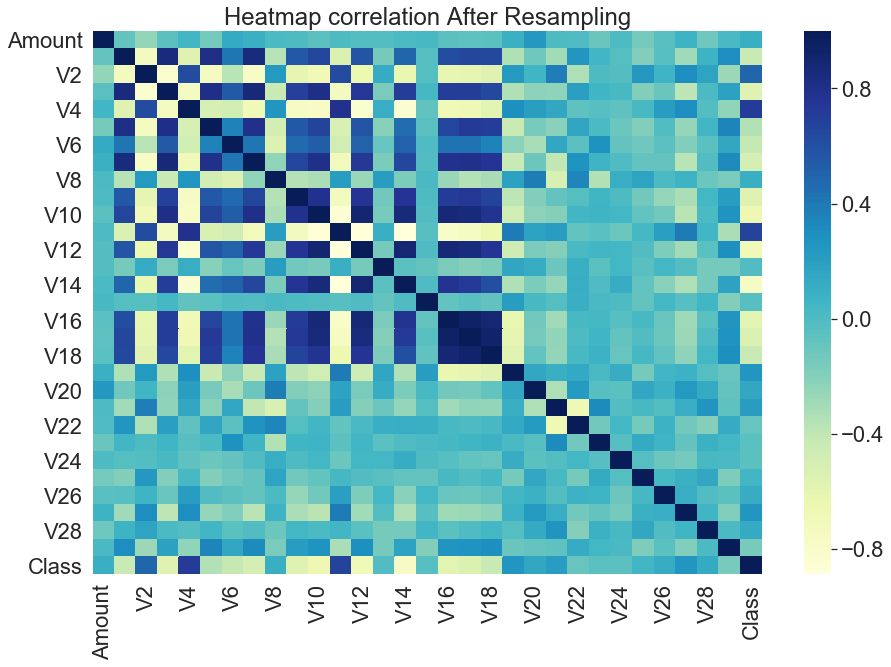

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(my_df.corr(), cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation After Resampling')
plt.show()

Then we define training and testing set after applying a dimension reduction to illustrate the fact that nothing will be gained because a PCA was previously computed

In [31]:
X_train_rank = X_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [32]:
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = X_test[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(Y_test)

In [33]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [34]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model Selection

In [35]:
measures = {"F1Score": f1_score, "Precision": precision_score, 
            "Recall": recall_score, "Accuracy": accuracy_score}

## SVM

In [36]:
# SVM
classifier = svm.SVC(kernel='linear',probability=True) # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)
classifier.fit(X_train, Y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.

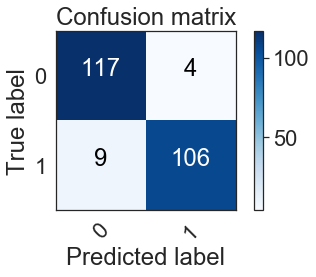

In [38]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [39]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9263743551952837


In [40]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 106 frauds / 115 total frauds.

So, the probability to detect a fraud is 0.9217391304347826
the accuracy is : 0.9449152542372882


In [41]:
classifier.fit(X_train_rank, Y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.

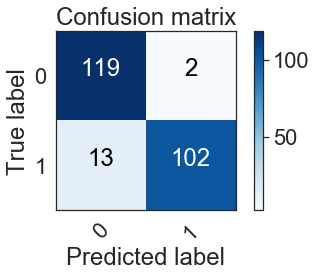

In [42]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [43]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.8968533529845246


In [44]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 102 frauds / 115 total frauds.

So, the probability to detect a fraud is 0.8869565217391304
the accuracy is : 0.9364406779661016


In [45]:
results_svm=[measures[measure](y_test_all,prediction_SVM) for measure in measures.keys()]
results_svm = pd.DataFrame(results_svm).T
results_svm.columns=measures.keys()
results_svm

F1Score  Precision    Recall  Accuracy
0  0.931507   0.980769  0.886957  0.936441

We can see that the study using the reduced data is far from unrelevant, which means that the last step of the previously computed PCA could have been done in a more efficient way. Indeed one of the main question we have with the PCA once we calculated the principals components direction, is how many of this component are we gonna keep. This means that some of the 30 dimensions are do not discriminate classes that much.

## Re-balanced class weigh

In this previously used SVM model, the weigh of each class was the same, which means that missing a fraud is as bad as misjudging a non-fraud. The objective, for a bank, is to maximize the number of detected frauds! Even if it means considering more non-fraud tuple as fraudulent operation. So, we need to minimize the False positives : the number of no detected frauds.

Indeed, by modifying the class_weight parameter, we can chose which class to give more importance during the training phase. In this case, the class_1 which describes the fraudulent operations will be considered more important than the class_0 (non-fraud operation). However, in this case we will give more importance to the class_0 due to the large number of misclassed non-fraud operation. Of course the goal is to lose as little effective fraud as possible in the process.

In [46]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40},probability=True)

In [47]:
classifier_b.fit(X_train, Y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, cache_size=200, class_weight={0: 0.6, 1: 0.4}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
prediction_SVM_b_all = classifier_b.predict(X_test) #We predict all the data set.

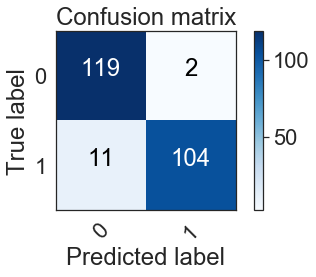

In [49]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [50]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9124613117170229


In [51]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 104 frauds / 115 total frauds.

So, the probability to detect a fraud is 0.9043478260869565
the accuracy is : 0.9449152542372882


In [52]:
classifier_b.fit(X_train_rank, Y_train) # Then we train our model, with our balanced data train.
prediction_SVM_b = classifier_b.predict(X_test_all_rank) #And finally, we predict our data test.

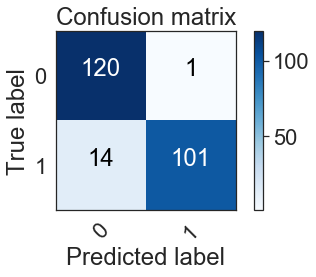

In [53]:
cm = confusion_matrix(y_test_all, prediction_SVM_b)
plot_confusion_matrix(cm,class_names)

In [54]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.8898968312453942


In [55]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 101 frauds / 115 total frauds.

So, the probability to detect a fraud is 0.8782608695652174
the accuracy is : 0.9364406779661016


In [56]:
results_svm_b=[measures[measure](y_test_all,prediction_SVM_b) for measure in measures.keys()]
results_svm_b = pd.DataFrame(results_svm_b).T
results_svm_b.columns=measures.keys()
results_svm_b

F1Score  Precision    Recall  Accuracy
0  0.930876   0.990196  0.878261  0.936441

In [57]:
print(classification_report(y_test_all,prediction_SVM_b, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.99      0.94       121
       Fraud       0.99      0.88      0.93       115

    accuracy                           0.94       236
   macro avg       0.94      0.93      0.94       236
weighted avg       0.94      0.94      0.94       236



## KNN

In [58]:
#Using grid search:

#Set up the searching area
grid_param = {  
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

In [59]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(KNeighborsClassifier(),  
                     param_grid = grid_param,
                     scoring = 'accuracy',
                     n_jobs=-1)

In [60]:
print(gd_sr.fit(X_train_rank, Y_train).best_score_)

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



0.942090395480226


In [61]:
print(gd_sr.fit(X_train_rank, Y_train).best_params_)

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



{'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'distance'}


In [62]:
# Store the Knn model

#knn_model_fin = KNeighborsClassifier(n_neighbors = 2,weights = 'uniform', metric = 'minkowski')
#knn_model_fin.fit(X_train_ran,Y)

!mkdir knn_model
knn_model_name = f'{my_path}/knn_model/knn_model_final.sav'
joblib.dump(gd_sr.best_estimator_,knn_model_name)

A subdirectory or file knn_model already exists.


['C:\\Users\\huang\\Dropbox/knn_model/knn_model_final.sav']

In [63]:
## Let's load the saved model first.
kNN_loaded = joblib.load(f'{my_path}/knn_model/knn_model_final.sav')

In [64]:
#Testing on the test set
y_test_pred = kNN_loaded.predict(X_test_all_rank)

In [65]:
# Print accuracy

print(accuracy_score(y_test_all,y_test_pred))

0.9322033898305084


In [66]:
print(classification_report(y_test_all,y_test_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.97      0.94       121
       Fraud       0.96      0.90      0.93       115

    accuracy                           0.93       236
   macro avg       0.93      0.93      0.93       236
weighted avg       0.93      0.93      0.93       236



In [67]:
results_knn=[measures[measure](y_test_all,y_test_pred) for measure in measures.keys()]
results_knn = pd.DataFrame(results_knn).T
results_knn.columns=measures.keys()
results_knn

F1Score  Precision    Recall  Accuracy
0  0.927928   0.962617  0.895652  0.932203

## RandomForestClassifier


In [68]:
from sklearn.ensemble import RandomForestClassifier

param={
    'n_estimators':[10,12,14,16],
    'max_depth':range(1,10)
}
grid=GridSearchCV(estimator=RandomForestClassifier(random_state=41),param_grid=param,cv=3,scoring='f1')
grid.fit(X_train_rank,Y_train)

print("best_params")
print(grid.best_params_)
print("best_score")
print(grid.best_score_)

best_params
{'max_depth': 7, 'n_estimators': 14}
best_score
0.9354954066934832


In [69]:
test_pre = grid.predict(X_test_all_rank)
test_pre_pro = grid.predict_proba(X_test_all_rank)
train_pre_pro = grid.predict_proba(X_train_rank)

In [70]:
results_rf = pd.DataFrame([measures[measure](y_test_all,test_pre) for measure in measures.keys()]).T
results_rf.columns=measures.keys()

results_rf

F1Score  Precision    Recall  Accuracy
0  0.932127   0.971698  0.895652  0.936441

## The result of using randomforest is quite good

In [71]:
print(classification_report(y_test_all,test_pre, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.98      0.94       121
       Fraud       0.97      0.90      0.93       115

    accuracy                           0.94       236
   macro avg       0.94      0.94      0.94       236
weighted avg       0.94      0.94      0.94       236



## The BMR classifier is a decision model based on quantifying tradeoffs between various decisions using probabilities and the costs that accompany such decisions.
## It's example dependent

## Saving score 
## The financial savings are defined as the cost of the algorithm versus the cost of using no algorithm at all.

In [72]:
from costcla.models import BayesMinimumRiskClassifier
from costcla.metrics import savings_score, cost_loss

bmr=BayesMinimumRiskClassifier()
bmr.fit(y_test_all, test_pre_pro)
# Predict
bmr_pre = bmr.predict(test_pre_pro, cost_mat_valid)
results_bmr = pd.DataFrame([measures[measure](y_test_all,bmr_pre) for measure in measures.keys()]).T
results_bmr.columns=measures.keys()

results_bmr['Savings']= savings_score(y_test_all, bmr_pre, cost_mat_valid)

results_bmr

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\costcla\models\directcost.py:101: RuntimeWarning:

divide by zero encountered in true_divide



F1Score  Precision    Recall  Accuracy   Savings
0  0.630631   0.654206  0.608696  0.652542  0.490339

## Its dissappointing that we got bad prediction using BayesMinimumRiskClassifier
## More importantly,If the recall score is worse, its meaningless to use this classifier

In [73]:
print(classification_report(y_test_all,bmr_pre, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.65      0.69      0.67       121
       Fraud       0.65      0.61      0.63       115

    accuracy                           0.65       236
   macro avg       0.65      0.65      0.65       236
weighted avg       0.65      0.65      0.65       236



## Try to use CostSensitiveRandomForestClassifier
## A  new cost-based impurity measure taking into account the costs when all the examples in a leaf
## Introduce cost during training

In [74]:
from costcla.models import CostSensitiveRandomForestClassifier

csrf=CostSensitiveRandomForestClassifier()
csrf_pre =csrf.fit(X_train_rank, Y_train, cost_mat_train).predict(X_test_all_rank, cost_mat_valid)


results_csrf = pd.DataFrame([measures[measure](y_test_all, csrf_pre) for measure in measures.keys()]).T
results_csrf.columns=measures.keys()
results_csrf["Savings"] = savings_score(y_test_all, csrf_pre,cost_mat_valid)

results_csrf

F1Score  Precision    Recall  Accuracy  Savings
0  0.707581   0.604938  0.852174   0.65678 -3.02596

## Still dissappointing results

In [75]:
print(classification_report(y_test_all,csrf_pre, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.77      0.47      0.58       121
       Fraud       0.60      0.85      0.71       115

    accuracy                           0.66       236
   macro avg       0.69      0.66      0.65       236
weighted avg       0.69      0.66      0.64       236



## In the distribution plot below we can see the effect of cost-sensitive learning. With an increasing transaction amount, the general distribution of predictions kind of expands to the right (higher fraud probabilities)

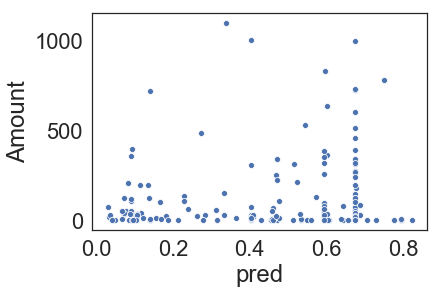

In [76]:
csrf_pro=csrf.predict_proba(X_test_all_rank)

csrf_pred_pro=[]

for i in csrf_pro:
    csrf_pred_pro.append(i[1])
    
dist_pd=pd.DataFrame(X_test.copy())
dist_pd['pred']=csrf_pred_pro

ax = sns.scatterplot(y="Amount", x="pred", data=dist_pd)

## DNN

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as K
def dnn(indput_dim, dropout=0.2):
    model = Sequential([
    Dense(units=16, input_dim=indput_dim, activation='relu'),
    Dropout(dropout),
    Dense(units=16, activation='relu'),
    Dropout(dropout),
    Dense(1, activation='sigmoid')])
    return model

In [78]:
clf = dnn(indput_dim=X_train_rank.shape[1], dropout=0.2)
clf.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
clf.fit(X_train_rank, Y_train,batch_size=64,
          epochs=50)

W0811 13:22:03.127927 20148 deprecation_wrapper.py:119] From c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 13:22:03.147876 20148 deprecation_wrapper.py:119] From c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 13:22:03.147876 20148 deprecation_wrapper.py:119] From c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 13:22:03.157874 20148 deprecation_wrapper.py:119] From c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is d

Epoch 1/50
708/708 [==============================] - 4s 5ms/step - loss: 1.0208 - acc: 0.5184
Epoch 2/50
708/708 [==============================] - 0s 127us/step - loss: 0.7449 - acc: 0.5862
Epoch 3/50
708/708 [==============================] - 0s 103us/step - loss: 0.6262 - acc: 0.6427
Epoch 4/50
708/708 [==============================] - 0s 91us/step - loss: 0.6074 - acc: 0.6610
Epoch 5/50
708/708 [==============================] - 0s 71us/step - loss: 0.5167 - acc: 0.7048
Epoch 6/50
708/708 [==============================] - 0s 72us/step - loss: 0.4846 - acc: 0.7500
Epoch 7/50
708/708 [==============================] - 0s 71us/step - loss: 0.4639 - acc: 0.7585
Epoch 8/50
708/708 [==============================] - 0s 97us/step - loss: 0.4278 - acc: 0.8023
Epoch 9/50
708/708 [==============================] - 0s 81us/step - loss: 0.4028 - acc: 0.8305
Epoch 10/50
708/708 [==============================] - 0s 71us/step - loss: 0.3917 - acc: 0.8559
Epoch 11/50
708/708 [=================

In [79]:
ann_pred=clf.predict(X_test_all_rank)

ann_pred1=[]
for i in ann_pred:
    ann_pred1.append(int(i>0.5))

## Quite good prediction

In [80]:
results_dnn = pd.DataFrame([measures[measure](y_test_all, ann_pred1) for measure in measures.keys()]).T
results_dnn.columns=measures.keys()


results_dnn

F1Score  Precision    Recall  Accuracy
0  0.936364   0.980952  0.895652  0.940678

In [81]:
print(classification_report(y_test_all,ann_pred1, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.98      0.94       121
       Fraud       0.98      0.90      0.94       115

    accuracy                           0.94       236
   macro avg       0.94      0.94      0.94       236
weighted avg       0.94      0.94      0.94       236



### Define predictors and target values
Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

# Gradient Boosting Model

### XGBoost is a gradient boosting algorithm.

Let's prepare the model.

<b>Prepare the model</b>

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [82]:
RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

target = 'Class'
predictors=df_rank.index[1:11].tolist()
#predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
#       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
#       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
#       'Amount']

In [83]:
import xgboost as xgb

# Prepare the train and valid datasets
dtrain = xgb.DMatrix(X_train_rank,Y_train)
dtest = xgb.DMatrix(X_test_all_rank,y_test_all)

#What to monitor (in this case, **train** )
watchlist = [(dtrain, 'train')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



In [84]:
xgb_model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.952513
Will train until train-auc hasn't improved in 50 rounds.
[50]	train-auc:0.986131
[100]	train-auc:0.991292
[150]	train-auc:0.993864
[200]	train-auc:0.996165
[250]	train-auc:0.997667
[300]	train-auc:0.998474
[350]	train-auc:0.999081
[400]	train-auc:0.999441
[450]	train-auc:0.99968
[500]	train-auc:0.999808
[550]	train-auc:0.999904
[600]	train-auc:0.999976
[650]	train-auc:0.999992
[700]	train-auc:0.999992
Stopping. Best iteration:
[691]	train-auc:1



In [85]:
preds = xgb_model.predict(dtest)

By default, the predictions made by XGBoost are probabilities. Because this is a binary classification problem, each prediction is the probability of the input pattern belonging to the first class. We can easily convert them to binary class values by rounding them to 0 or 1.

In [86]:
predictions = [round(value) for value in preds]

In [87]:
results_gb = pd.DataFrame([measures[measure](y_test_all,predictions) for measure in measures.keys()]).T
results_gb.columns=measures.keys()

results_gb

F1Score  Precision    Recall  Accuracy
0  0.920354   0.936937  0.904348  0.923729

In [88]:
print(classification_report(y_test_all,predictions, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.94      0.93       121
       Fraud       0.94      0.90      0.92       115

    accuracy                           0.92       236
   macro avg       0.92      0.92      0.92       236
weighted avg       0.92      0.92      0.92       236



## Logistics Regression Model

In [89]:
from sklearn.linear_model import LogisticRegression

#Using GridSearchCV to find the best parameters.
params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_1 = GridSearchCV(LogisticRegression(), params)
grid_1.fit(X_train_rank,  Y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_1.best_estimator_

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logist

In [90]:
log_pre=grid_1.predict(X_test_all_rank)

In [91]:
from sklearn.model_selection import cross_val_score
# Overfitting Case
score = cross_val_score(log_reg, X_train_rank,  Y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.08%


c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

In [92]:
results_log = pd.DataFrame([measures[measure](y_test_all,log_pre) for measure in measures.keys()]).T
results_log.columns=measures.keys()

results_log

F1Score  Precision    Recall  Accuracy
0  0.931507   0.980769  0.886957  0.936441

In [93]:
print(classification_report(y_test_all,log_pre, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.98      0.94       121
       Fraud       0.98      0.89      0.93       115

    accuracy                           0.94       236
   macro avg       0.94      0.94      0.94       236
weighted avg       0.94      0.94      0.94       236



# Learning Curve Plot

In [94]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve_for(estimator1, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ax1 = plt.subplots(1, 1, figsize=(20,10), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\huang\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

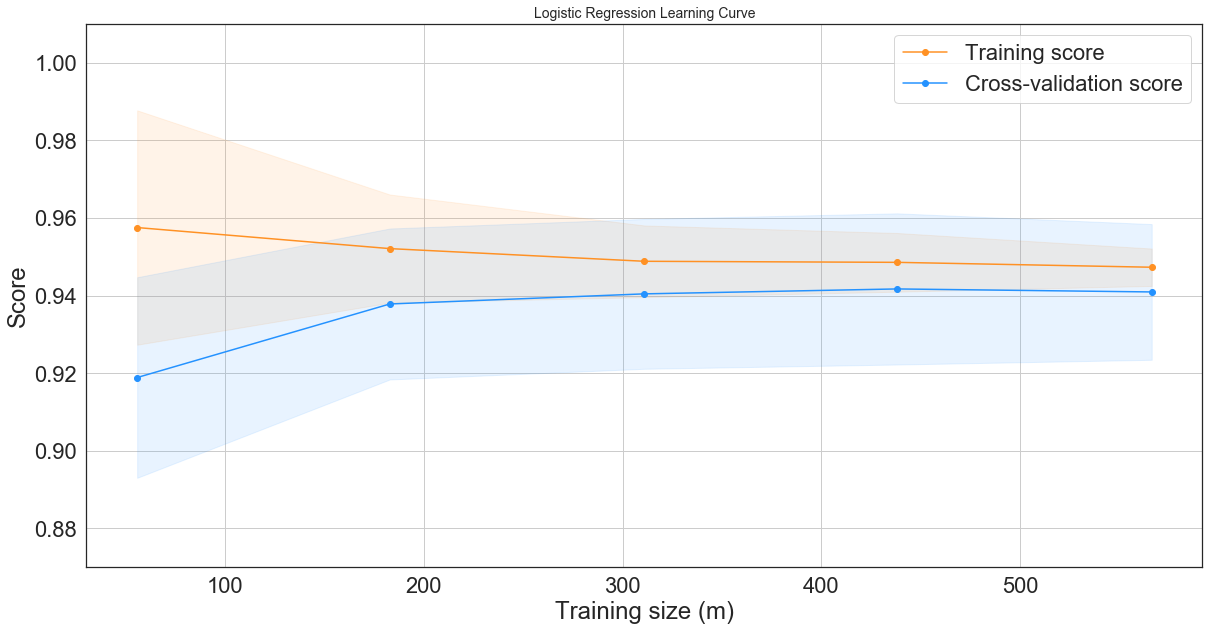

In [95]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve_for(log_reg,X_train_rank, Y_train, (0.87, 1.01), cv=cv, n_jobs=4)


## Roc curve

In [96]:
from sklearn.metrics import roc_curve,roc_auc_score



rf_fpr, rf_tpr, rf_thresold = roc_curve(y_test_all,grid.best_estimator_.predict_proba(X_test_all_rank)[:, 1])
csrf_fpr, csrf_tpr, csrf_threshold = roc_curve(y_test_all, csrf_pro[:,1])
dnn_fpr, dnn_tpr, dnn_threshold = roc_curve(y_test_all, clf.predict_proba(X_test_all_rank))
svm_fpr, svm_tpr, svm_thresold = roc_curve(y_test_all,classifier.predict_proba(X_test_all_rank)[:, 1])
svmb_fpr, svmb_tpr, svmb_thresold = roc_curve(y_test_all,classifier_b.predict_proba(X_test_all_rank)[:, 1])
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test_all,kNN_loaded.predict_proba(X_test_all_rank)[:, 1])
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test_all,preds)
log_fpr, log_tpr, log_thresold = roc_curve(y_test_all,grid_1.best_estimator_.predict_proba(X_test_all_rank)[:, 1])


def plot_roc_curve(rf_fpr, rf_tpr, csrf_fpr, csrf_tpr, dnn_fpr, dnn_tpr,svm_fpr, svm_tpr,svmb_fpr, svmb_tpr,knn_fpr, knn_tpr,xgb_fpr, xgb_tpr,log_fpr, log_tpr):
    plt.figure(figsize=(20,15))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(rf_fpr, rf_tpr, label='RandomForestClassifier Score: {:.4f}'.format(roc_auc_score(y_test_all,grid.best_estimator_.predict_proba(X_test_all_rank)[:, 1])))
    #plt.plot(bmr_fpr, bmr_tpr, label='BMR Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, bmr_pred_1)))
    plt.plot(csrf_fpr, csrf_tpr, label='CSRF Classifier Score: {:.4f}'.format(roc_auc_score(y_test_all, csrf_pro[:,1])))
    plt.plot(dnn_fpr, dnn_tpr, label='DNN Score: {:.4f}'.format(roc_auc_score(y_test_all, clf.predict_proba(X_test_all_rank))))
    plt.plot(svm_fpr, svm_tpr, label='SVM Score: {:.4f}'.format(roc_auc_score(y_test_all,classifier.predict_proba(X_test_all_rank)[:, 1])))
    plt.plot(svmb_fpr, svmb_tpr, label='SVM_b Score: {:.4f}'.format(roc_auc_score(y_test_all,classifier_b.predict_proba(X_test_all_rank)[:, 1])))
    plt.plot(knn_fpr, knn_tpr, label='KNN Score: {:.4f}'.format(roc_auc_score(y_test_all,kNN_loaded.predict_proba(X_test_all_rank)[:, 1])))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Score: {:.4f}'.format(roc_auc_score(y_test_all,preds)))
    plt.plot(log_fpr, log_tpr, label='LogisticsRegression Score: {:.4f}'.format(roc_auc_score(y_test_all,grid_1.best_estimator_.predict_proba(X_test_all_rank)[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

## Roc curve of different models are similar except the curve of CSRF

[]

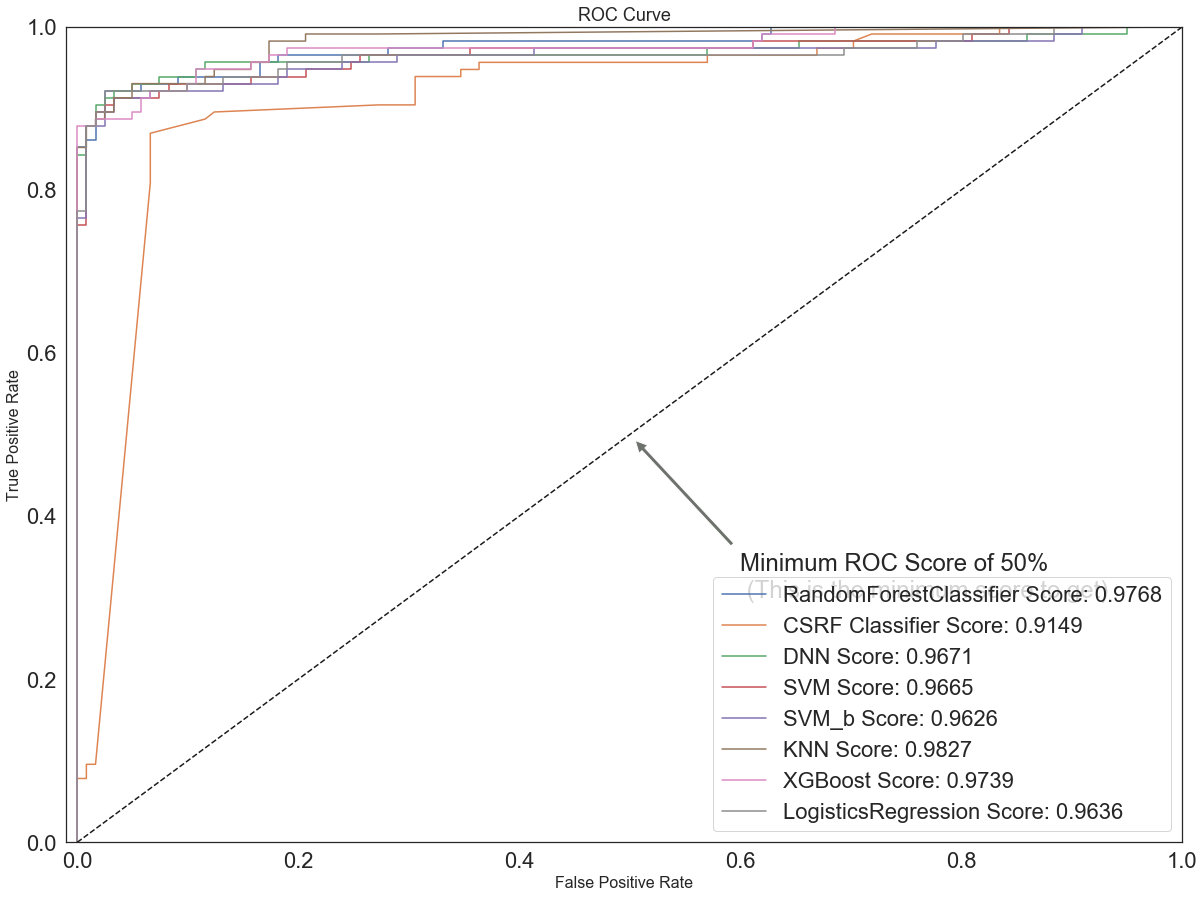

In [97]:
plot_roc_curve(rf_fpr, rf_tpr, csrf_fpr, csrf_tpr, dnn_fpr, dnn_tpr,svm_fpr, svm_tpr,svmb_fpr, svmb_tpr,knn_fpr, knn_tpr,xgb_fpr, xgb_tpr,log_fpr, log_tpr)
plt.plot()

## Evaluation of different models' prediction

In [98]:
res=pd.concat([results_svm,results_svm_b,results_knn,results_dnn,results_csrf,results_bmr,results_rf,results_gb,results_log],axis=0)

c:\users\huang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [102]:
res.index=['SVM','SVM_b','KNN','DNN','CSRF','BMR','RandomForest','XGBoost','LogisticsRegression']
res

Accuracy   F1Score  Precision    Recall   Savings
SVM                  0.936441  0.931507   0.980769  0.886957       NaN
SVM_b                0.936441  0.930876   0.990196  0.878261       NaN
KNN                  0.932203  0.927928   0.962617  0.895652       NaN
DNN                  0.940678  0.936364   0.980952  0.895652       NaN
CSRF                 0.656780  0.707581   0.604938  0.852174 -3.025960
BMR                  0.652542  0.630631   0.654206  0.608696  0.490339
RandomForest         0.936441  0.932127   0.971698  0.895652       NaN
XGBoost              0.923729  0.920354   0.936937  0.904348       NaN
LogisticsRegression  0.936441  0.931507   0.980769  0.886957       NaN

In [103]:
res.fillna(value=0)

Accuracy   F1Score  Precision    Recall   Savings
SVM                  0.936441  0.931507   0.980769  0.886957  0.000000
SVM_b                0.936441  0.930876   0.990196  0.878261  0.000000
KNN                  0.932203  0.927928   0.962617  0.895652  0.000000
DNN                  0.940678  0.936364   0.980952  0.895652  0.000000
CSRF                 0.656780  0.707581   0.604938  0.852174 -3.025960
BMR                  0.652542  0.630631   0.654206  0.608696  0.490339
RandomForest         0.936441  0.932127   0.971698  0.895652  0.000000
XGBoost              0.923729  0.920354   0.936937  0.904348  0.000000
LogisticsRegression  0.936441  0.931507   0.980769  0.886957  0.000000

In [104]:
res_no_s=res.drop(['Savings'],axis=1)

## Randomforest and DNN are the best models if we look into the graph below

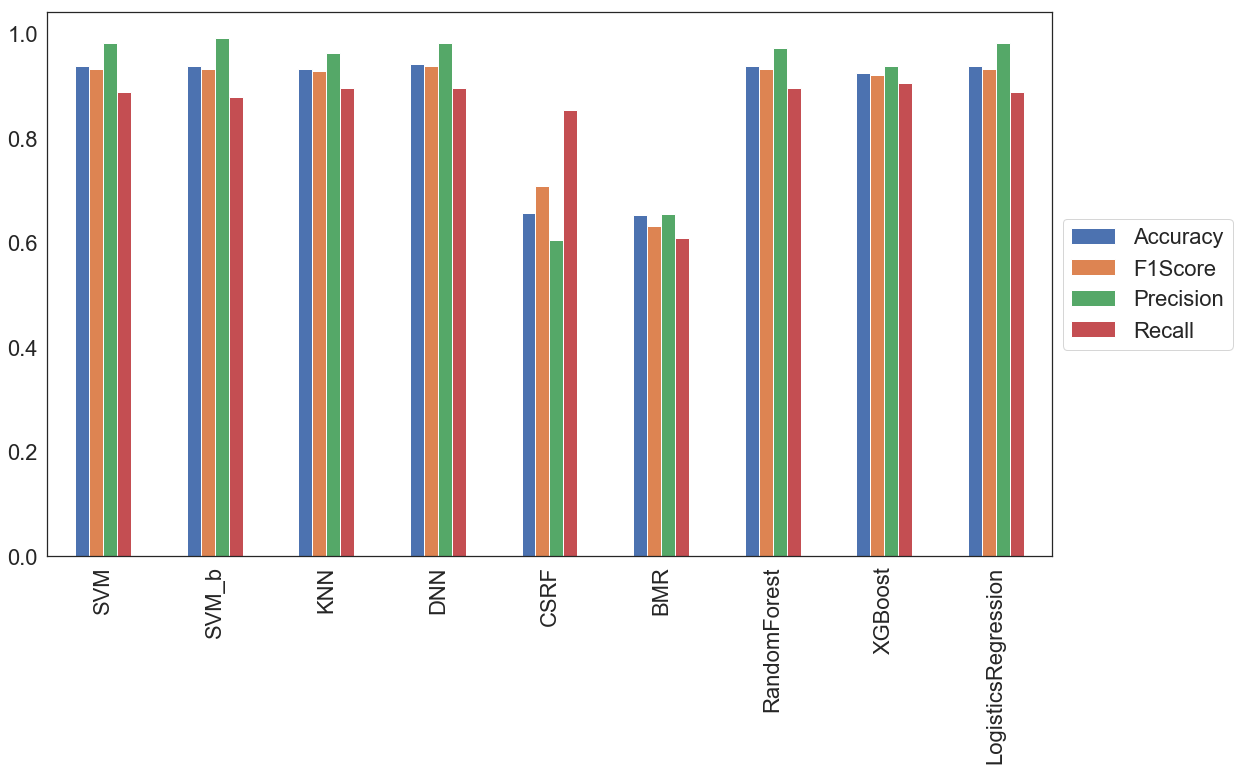

In [105]:
res_no_s.plot(kind='bar',figsize=(18,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


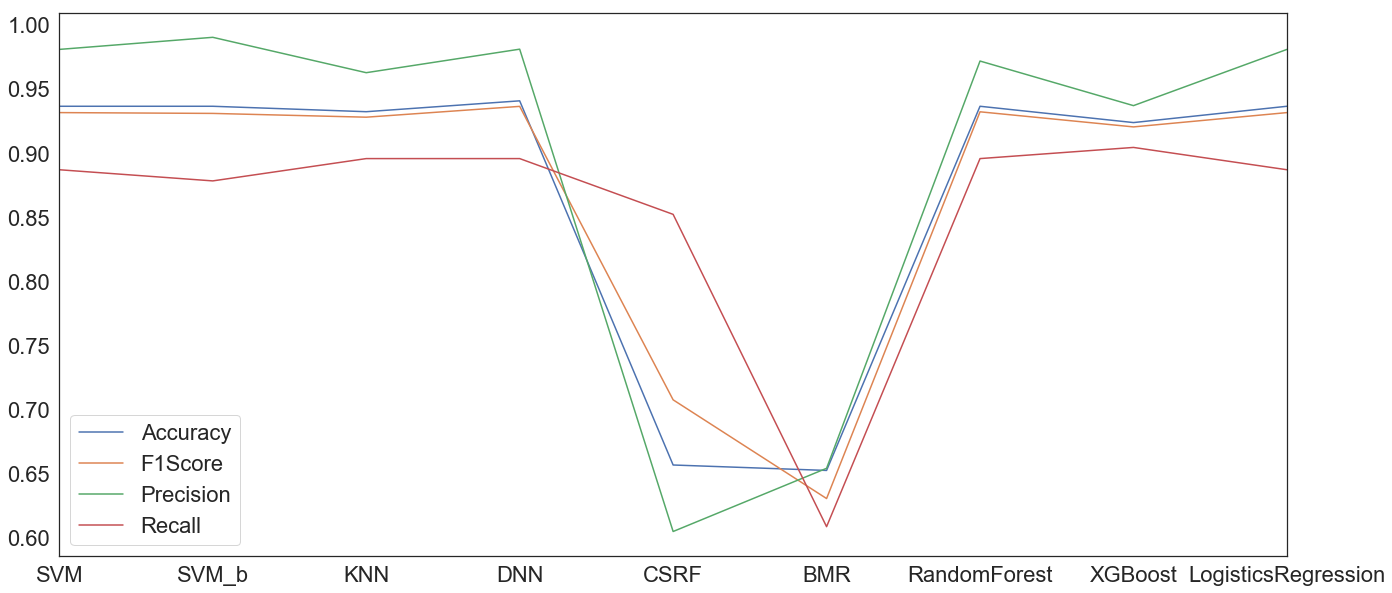

In [106]:
res_no_s.plot(kind='line',figsize=(22,10))